<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [45]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [48]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

print(boston_df['CHAS'].value_counts())
boston_df

CHAS
0.0    471
1.0     35
Name: count, dtype: int64


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task: Generate Descriptive Statistics & Visualizations

#### For the "Median value of owner-occupied homes" provde a boxplot

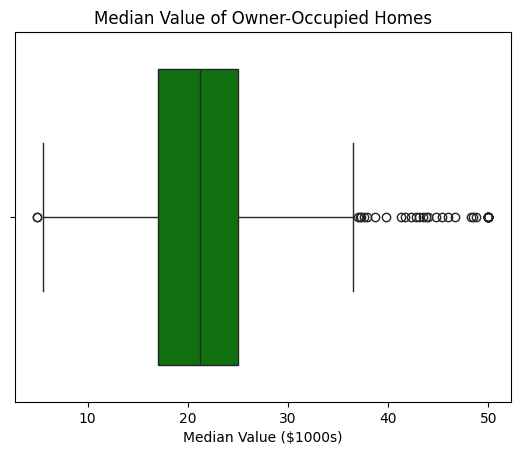

In [14]:
median_ax = sns.boxplot(x='MEDV',color='green',data=boston_df)
plt.title('Median Value of Owner-Occupied Homes')
plt.xlabel('Median Value ($1000s)')
plt.show()

#### Provide a  bar plot for the Charles river variable

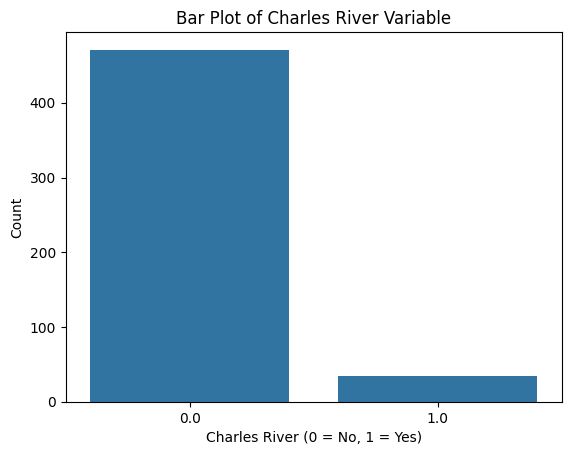

In [22]:
chas_count = boston_df['CHAS'].value_counts().reset_index()
chas_count.columns = ['CHAS', 'Count']
bp_river = sns.barplot(x='CHAS', y='Count', data=chas_count)
plt.title('Bar Plot of Charles River Variable')
plt.xlabel('Charles River (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

#### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Text(0, 0.5, 'Median Value')

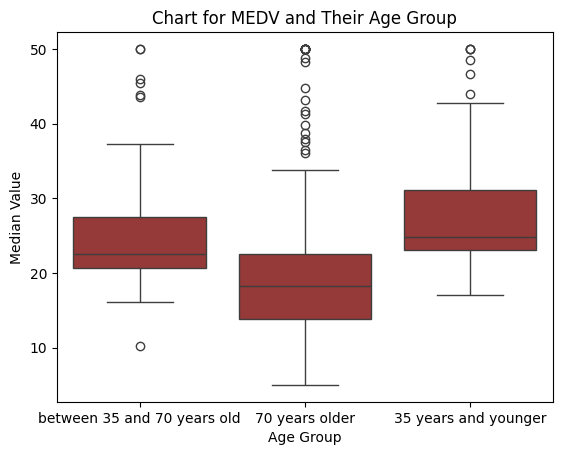

In [46]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] <= 70), 'age_group'] = 'between 35 and 70 years old'
boston_df.loc[(boston_df['AGE'] > 70), 'age_group'] = '70 years older'

# boston_df[['MEDV', 'age_group']]

median_age_medv = sns.boxplot( x="age_group", y='MEDV', color='brown',data=boston_df)
plt.title('Chart for MEDV and Their Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value')


####  Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0, 0.5, 'Nitric Oxide Concentrations (NOX)')

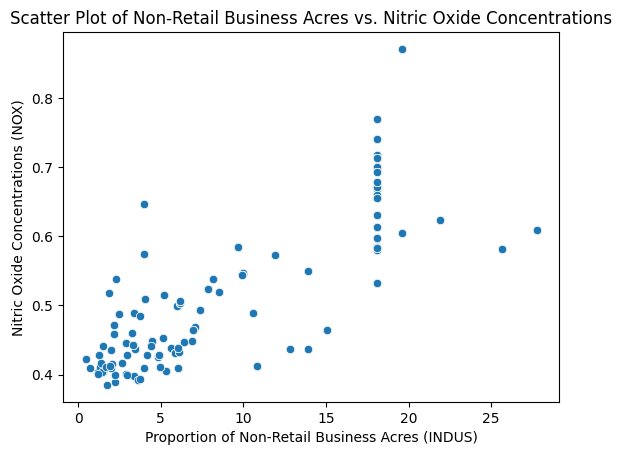

In [41]:
re = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Scatter Plot of Non-Retail Business Acres vs. Nitric Oxide Concentrations')
plt.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.ylabel('Nitric Oxide Concentrations (NOX)')

#### Create a histogram for the pupil to teacher ratio variable

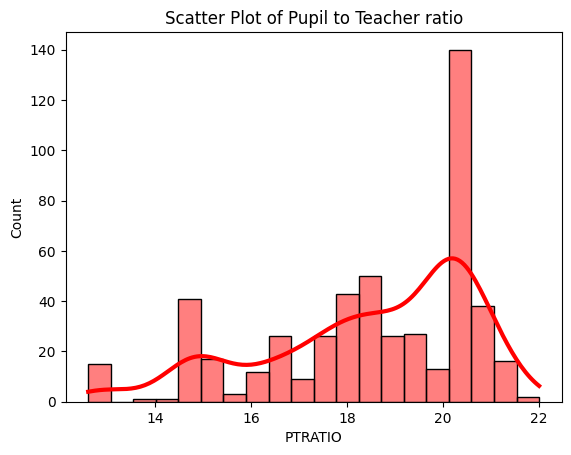

In [44]:
ax = sns.histplot(boston_df['PTRATIO'],bins=20, kde=True, color='red',line_kws={"linewidth": 3})
plt.title('Scatter Plot of Pupil to Teacher ratio')
plt.show()

# Task: Use the appropriate tests to answer the questions provided.

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [51]:
ss.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'], 
             boston_df[boston_df['CHAS'] == 1.0]['MEDV'], equal_var=True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

**Conclusion:** Since the p-value is more than the alpha value 0.05, we reject the null hypothesis as indicates a statistically significant difference in the median home values between areas bordering the Charles River and those that do not

#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)


In [57]:
thirtyfive_younger = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years old']['MEDV']
seventy_order = boston_df[boston_df['age_group'] == '70 years older']['MEDV']

stat, pValue = ss.f_oneway(thirtyfive_younger, thirtyfive_seventy, seventy_order) 
print("F_Statistic: {0}, P-Value: {1}".format(stat,pValue))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion**: Since the p-value is greater than 0.05, we will reject the null hypothesis as there is significant evidence that the difference of it across the age groups of homes

#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)


In [58]:
ss.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209157, pvalue=7.91336106123623e-98)

**Conclusion**: Since the p-value greater than 0.05 therefore there is a very strong evidence to conclude that there is a significant exist relationship between the Nitric Oxide Concentrations and Non-Retail Business Ac

#### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [60]:
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        21:52:24   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion**: Based on the output, the increase in the additional weighted distance to the Bostin employment centers is associated with high median values of owner occupied homes (MEDV)